In [102]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import gaussian_kde

In [167]:
#import dataframe
album_df = pd.read_pickle('album_df.pkl')

In [168]:
album_df.head()

,album_run_time_ms,number_of_tracks,danceability_mean,energy_mean,acousticness_mean,instrumentalness_mean,liveness_mean,loudness_mean,speechiness_mean,valence_mean,tempo_mean,popularity_mean,Score_mean,is_explicit_mean,mode_mean,key_mean,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.871667,0.569000,0.046364,0.000119,0.177453,-7.147600,0.254213,0.413020,126.265133,62.000000,7.8,1.0000,0.666667,4.400000,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.724300,0.384600,0.374767,0.532800,0.200730,-15.015700,0.094240,0.362970,100.700800,4.500000,7.4,0.0000,0.500000,8.100000,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.443889,0.174333,0.957778,0.205918,0.114111,-13.239333,0.037156,0.214989,118.242111,33.000000,8.4,0.0000,0.444444,4.777778,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.562154,0.601769,0.464462,0.011059,0.148254,-6.111769,0.084700,0.455692,124.775154,51.461538,7.4,0.0000,0.615385,5.153846,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.377625,0.494812,0.406806,0.049877,0.147925,-12.121375,0.040194,0.268081,105.696000,1.875000,7.1,0.0625,0.687500,4.375000,ElectronicRock


In [169]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 007DWn799UWvfY1wwZeENR to 7zgo8oFUtR2cVQbhDZ0o6V
Data columns (total 17 columns):
album_run_time_ms        1604 non-null float64
number_of_tracks         1604 non-null float64
danceability_mean        1604 non-null float64
energy_mean              1604 non-null float64
acousticness_mean        1604 non-null float64
instrumentalness_mean    1604 non-null float64
liveness_mean            1604 non-null float64
loudness_mean            1604 non-null float64
speechiness_mean         1604 non-null float64
valence_mean             1604 non-null float64
tempo_mean               1604 non-null float64
popularity_mean          1604 non-null float64
Score_mean               1604 non-null float64
is_explicit_mean         1604 non-null float64
mode_mean                1604 non-null float64
key_mean                 1604 non-null float64
genres                   1604 non-null object
dtypes: float64(16), object(1)
memory usage: 225.6+ KB


## EDA Questions

1. What is the pitchfork rating distribution?
2. What are the most commonly reviewed genres?
3. How many songs are there per album?
4. reviews vs. popularity
5. highest rated genres

### 1. What is the pitchfork rating distribution?

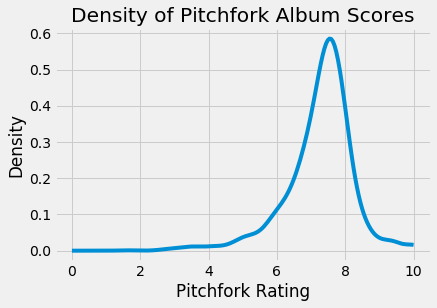

In [170]:
#plotting rating density
density = gaussian_kde(album_df['Score_mean'])
xs = np.linspace(0,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.ylabel('Density')
plt.xlabel('Pitchfork Rating')
plt.title('Density of Pitchfork Album Scores')
plt.show()

In [171]:
album_df['Score_mean'].mean()

7.253865336658361

In [172]:
len(album_df[album_df['Score_mean'] >= 9])

47

In [173]:
len(album_df[album_df['Score_mean'] == 10])

14

It appears that Pitchfork tends to rate most albums between 6-8 out of 10 with around 60% of their ratings around 7.5. The average rating for an album is 7.25 and they have only rated 47 albums above 9, 14 of those albums being scored a 10. It is important to note that this is only a subset of pitchforks reviews thus the true distributions would require more data. 

### 2. What are the most commonly reviewed genres?

In [174]:
album_df.genres.value_counts()

Rock                      526
Rap                       265
Electronic                218
Pop/R&B                   211
Experimental              152
Folk/Country               82
Metal                      48
Jazz                       48
ElectronicRock             21
ExperimentalRock           12
Global                     11
ExperimentalElectronic     10
Name: genres, dtype: int64

In [175]:
s = album_df.genres.value_counts()

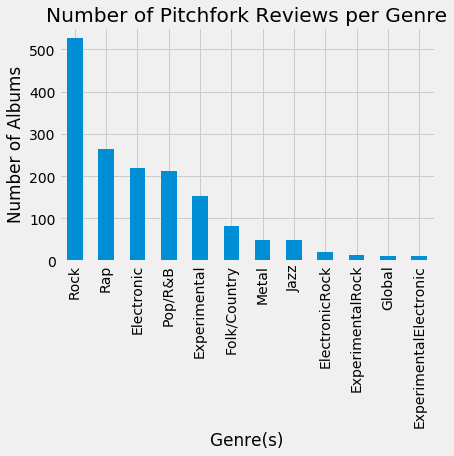

In [176]:
#plot bar chart of reviews per music genre
s.plot.bar()
plt.ylabel('Number of Albums')
plt.xlabel('Genre(s)')
plt.title('Number of Pitchfork Reviews per Genre')
plt.show()

It appears that Pitchfork tends to review Rock, Rap, Electronic, and Pop/R&B mostly. Their most commonly reviewed genre is Rock (531 reviews) which makes sense as they are an indie music review website and Indie Rock was the original indie music originating in the 1970's.

### 3. How many songs are there per album?

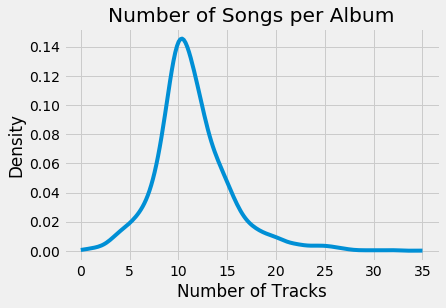

In [177]:
density2 = gaussian_kde(album_df['number_of_tracks'])
xs2 = np.linspace(0,35,200)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs2,density2(xs2))
plt.ylabel('Density')
plt.xlabel('Number of Tracks')
plt.title('Number of Songs per Album')
plt.show()

In [178]:
album_df['number_of_tracks'].max()

35.0

In [179]:
album_df['number_of_tracks'].mean()

11.450124688279303

From this visualization you can see that most albums have around 8-15 tracks. The maximum number of tracks is 35 and the average is 11.

### 4. What is the distribution of explicitness?

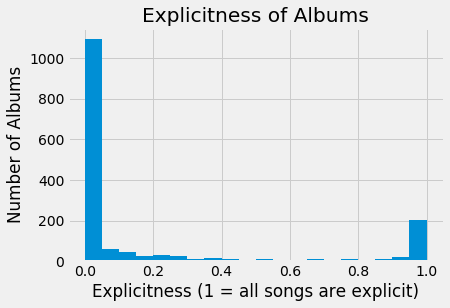

In [183]:
#plot histogram of explicit albums
p = album_df.is_explicit_mean
plt.hist(p, bins = 20)
plt.ylabel('Number of Albums')
plt.xlabel('Explicitness (1 = all songs are explicit)')
plt.title('Explicitness of Albums')
plt.show()

From this plot, it is evident that most albums reviewed by pitchfork have no explicit lyrics and the next largest category is all explicit lyrics. It seems that albums tend to either be completely explicity or have no explicit lyrics.